In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

import seaborn as sns

sns.set_style("whitegrid")

%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
cancer = load_breast_cancer()

# Without Pipeline

training

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [5]:
scaler = MinMaxScaler().fit(X_train)

In [6]:
X_train_scaled = scaler.transform(X_train)

In [12]:
X_train[:, 0][:5]

array([ 11.85,  11.22,  20.13,  13.59,  16.69])

In [13]:
X_train_scaled[:, 0][:5]

array([ 0.23044157,  0.20062473,  0.62232003,  0.31279284,  0.45951063])

In [14]:
svm = SVC()
svm.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
X_test_scaled = scaler.transform(X_test)

In [16]:
print("Test score: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test score: 0.95


grid search (bad example!)

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [19]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)

In [20]:
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [23]:
print("cv score: {:.2f}".format(grid.best_score_))
print("test score: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("best param: {}".format(grid.best_params_))

cv score: 0.98
test score: 0.97
best param: {'C': 1, 'gamma': 1}


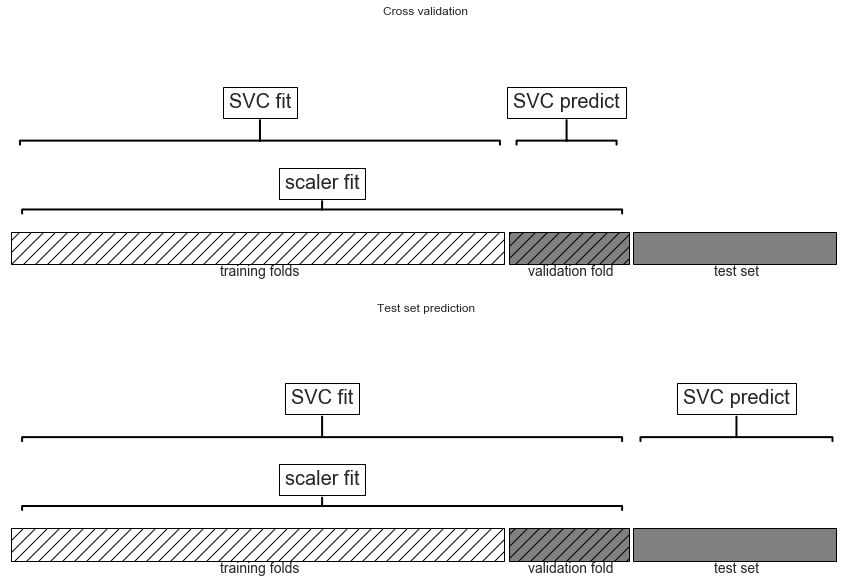

In [45]:
mglearn.plots.plot_improper_processing()

# Pipeline

In [24]:
from sklearn.pipeline import Pipeline

In [25]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

In [26]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [27]:
print("test score: {:.2f}".format(pipe.score(X_test, y_test)))

test score: 0.95


grid search (good example!)

In [31]:
param_grid = {
    'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [42]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=1)
grid

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [43]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [44]:
print("cv score: {:.2f}".format(grid.best_score_))
print("test score: {:.2f}".format(grid.score(X_test, y_test)))
print("best param: {}".format(grid.best_params_))

cv score: 0.98
test score: 0.97
best param: {'svm__C': 1, 'svm__gamma': 1}


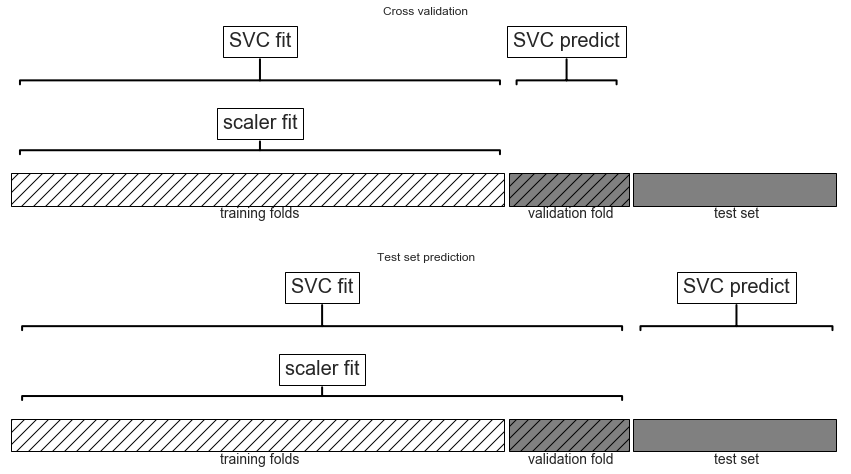

In [46]:
mglearn.plots.plot_proper_processing()

# What is Data Leak?

In [57]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100, ))

In [58]:
from sklearn.feature_selection import SelectPercentile, f_regression

Data Leak example

In [59]:
select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)

In [65]:
X_selected = select.transform(X)

In [67]:
X_selected.shape

(100, 500)

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [73]:
scores = cross_val_score(Ridge(), X_selected, y, cv=5)
print("validate score: {:.2f}".format(np.mean(scores)))

validate score: 0.91


OK example

In [75]:
pipe = Pipeline([("select", SelectPercentile(score_func=f_regression, percentile=5)), ("ridge", Ridge())])

In [76]:
scores = cross_val_score(pipe, X, y, cv=5)
print("validate score: {:.2f}".format(np.mean(scores)))

validate score: -0.25


# Generate Pipeline

In [77]:
from sklearn.pipeline import make_pipeline

In [79]:
pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [81]:
pipe_long.steps

[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('svm', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]

In [82]:
pipe_short.steps

[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('svc', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False))]

# Grid Search with Pipeline

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [85]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [86]:
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

In [87]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)

In [88]:
grid = GridSearchCV(pipe, param_grid, cv=5)

In [89]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [90]:
print("best estimator: \n{}".format(grid.best_estimator_))

best estimator: 
Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [91]:
grid.best_estimator_.named_steps["logisticregression"]

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
grid.best_estimator_.named_steps["logisticregression"].coef_

array([[-0.38856355, -0.37529972, -0.37624793, -0.39649439, -0.11519359,
         0.01709608, -0.3550729 , -0.38995414, -0.05780518,  0.20879795,
        -0.49487753, -0.0036321 , -0.37122718, -0.38337777, -0.04488715,
         0.19752816,  0.00424822, -0.04857196,  0.21023226,  0.22444999,
        -0.54669761, -0.52542026, -0.49881157, -0.51451071, -0.39256847,
        -0.12293451, -0.38827425, -0.4169485 , -0.32533663, -0.13926972]])

# Pre-processing + Grid Search

In [93]:
from sklearn.datasets import load_boston
boston = load_boston()

In [94]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

In [95]:
from sklearn.preprocessing import PolynomialFeatures

In [96]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [97]:
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],
    'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

In [109]:
pipe

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [146]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose=1, n_jobs=1)

In [147]:
%time
grid.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 4.05 µs
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3], 'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [143]:
grid.cv_results_['mean_test_score']

array([   0.72169353,    0.721697  ,    0.72173126,    0.7220378 ,
          0.72307143,    0.70772151,    0.73864353,    0.73756794,
          0.7441318 ,    0.77682137,    0.82103778,    0.80630064,
       -181.61396361,  -49.22387801,   -3.07615973,    0.27656439,
          0.63362711,    0.58780662])

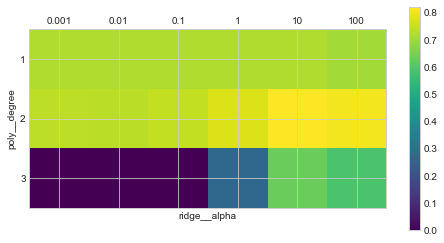

In [140]:
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1), vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("poly__degree")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])), param_grid['polynomialfeatures__degree'])
plt.colorbar()
plt.show()

# Search Best Model

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [152]:
param_grid = [
    {
        'classifier': [SVC()],
        'preprocessing': [StandardScaler(), None],
        'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'classifier': [RandomForestClassifier(n_estimators=100)],
        'preprocessing': [None],
        'classifier__max_features': [1, 2, 3]
    }
]

In [153]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [156]:
grid = GridSearchCV(pipe, param_grid, cv=5, verbose=1)

In [157]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits


[Parallel(n_jobs=1)]: Done 375 out of 375 | elapsed:    6.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preprocessing', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'classifier': [SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)], 'preprocessing': [StandardScaler(copy=True, with...=0,
            warm_start=False)], 'preprocessing': [None], 'classifier__max_features': [1, 2, 3]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [158]:
print("Best params:\n{}\n".format(grid.best_params_))
print("Best validate score: {:.2f}".format(grid.best_score_))
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier': SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

Best validate score: 0.99
Test score: 0.98
